In [2]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 532.9/532.9 kB 3.7 MB/s eta 0:00:00


In [3]:
!pip install joblib

In [4]:
import numpy as np
import pandas as pd
import lightgbm as lgb
import seaborn as sns
import matplotlib.pyplot as plt
import shap
import warnings


from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [5]:
df = pd.read_csv('/content/drive/MyDrive/tidaldatathon/student_data.csv')



In [6]:
#dealing with categorical features through encoding or by dropping non-important variables (deemed non-important through analyzing feature importance)

schooldict = {'GP': 0, 'MS': 1}
sexdict = {'F':0, 'M':1}
addressdict = {'U':0, 'R':1}
famsizedict = {'LE3': 0, 'GT3': 1}
pstatusdict = {'T': 0, 'A': 1}
yesnodict = {'yes': 0, 'no': 1}

for i in ['Mjob', 'Fjob', 'reason', 'guardian']:
  df = df.drop(i,axis=1)

for i in [schooldict,sexdict,addressdict,famsizedict,pstatusdict,yesnodict]:
  df = df.replace(i)


In [7]:
df['help'] = np.where(df['G3'] >= 14, 0, 1)

In [8]:
df = df.drop("G3", axis=1)

In [9]:
important_cols = ['paid', 'activities', 'absences', 'studytime', 'Walc', 'romantic', 'famsup', 'freetime', 'Medu', 'health', 'help']

df = df[important_cols]

In [10]:
y = df['help']

X = df.drop("help", axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [12]:
model_drt = lgb.LGBMClassifier(boosting_type='dart')
model_drt.fit(X_train, y_train)




[LightGBM] [Info] Number of positive: 242, number of negative: 74
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000286 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 57
[LightGBM] [Info] Number of data points in the train set: 316, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.765823 -> initscore=1.184873
[LightGBM] [Info] Start training from score 1.184873
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[Li

LGBMClassifier(boosting_type='dart')

In [13]:
y_pred_drt = model_drt.predict(X_test)


In [14]:
accuracy_drt = accuracy_score(y_test, y_pred_drt)

conf_matrix_drt = confusion_matrix(y_test, y_pred_drt)
norm_conf_matrix_drt = confusion_matrix(y_test,y_pred_drt,normalize='true')

accuracy_drt

0.6708860759493671

<function matplotlib.pyplot.show(close=None, block=None)>

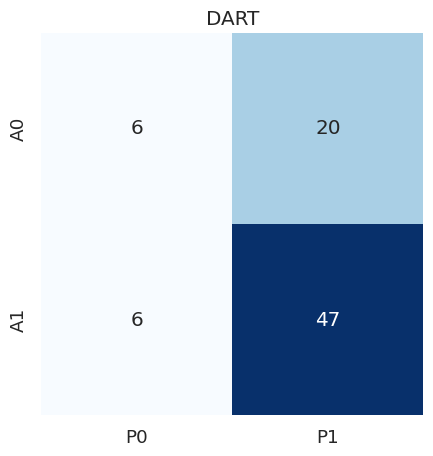

In [15]:
sns.set(font_scale=1.2)


# Create a heatmap of the confusion matrix
sns.heatmap(conf_matrix_drt, annot=True, fmt="d", cmap="Blues", cbar=False, square=True,
            xticklabels=["P0", "P1"],
            yticklabels=["A0", "A1"])

# Add labels and a title

plt.title('DART')

plt.tight_layout()
plt.show

<Axes: title={'center': 'DART'}, xlabel='Feature importance', ylabel='Features'>

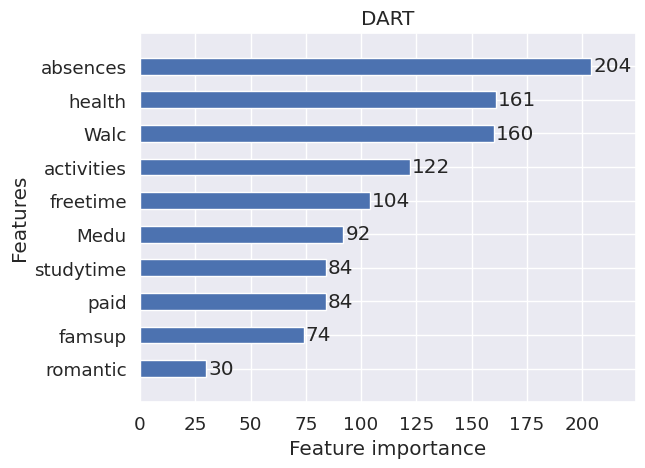

In [16]:
lgb.plot_importance(model_drt, height = 0.5, title='DART')

In [17]:
explainer_new_drt = shap.Explainer(model_drt, X)
new_shap_values_drt = explainer_new_drt(X)

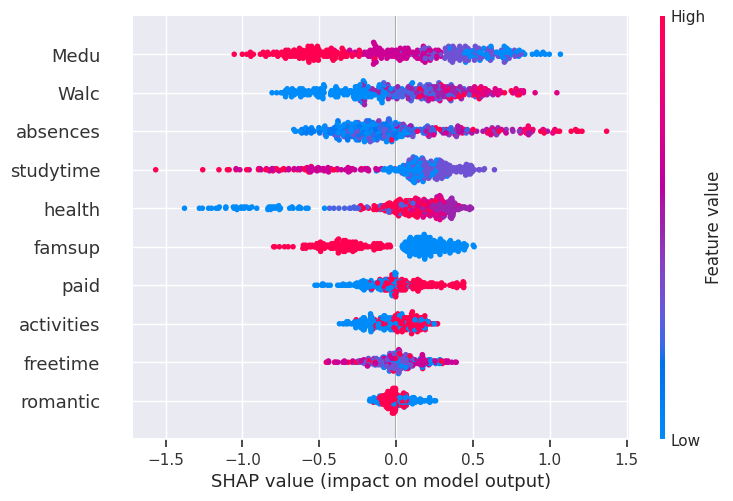

In [18]:
shap.plots.beeswarm(new_shap_values_drt)

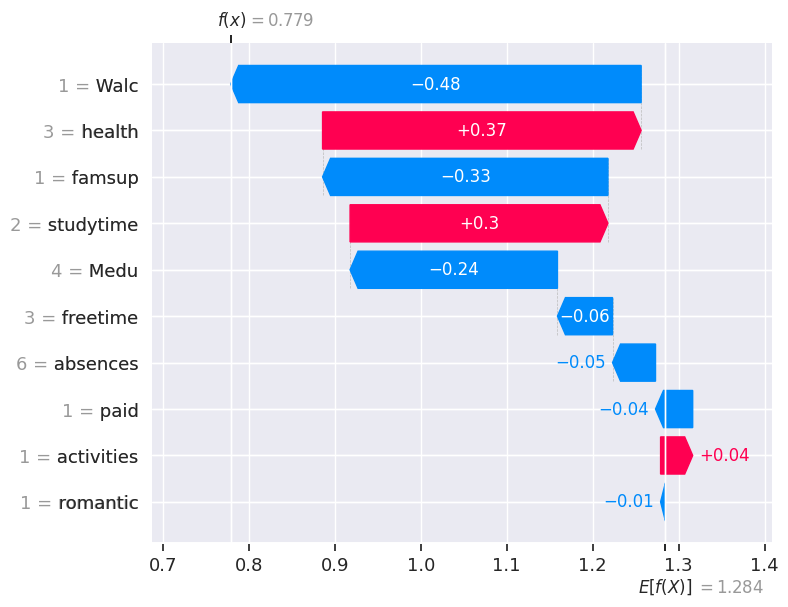

In [19]:
shap.plots.waterfall(new_shap_values_drt[0])

In [20]:
import joblib
joblib.dump(model_drt, 'modelg0.pkl')
!cp modelg0.pkl /content/drive/MyDrive/tidaldatathon